In [ ]:
# This notebook is exploratory to see what is possible --> Solely for research when developing this project
# This hange comes from the colab notebook to make sure that everything is syncing properly

## Testing a very barebones model that is one modality (raw figures)
Will work on adding multimodality later
I will also need to work on adding treatments for sparsity of separate data sources os that the model is robust enough to predict whether or not something is missing.

Approach:

1. Maybe creating multiple models based on combinations of each input medium and adding a conditional that chooses which model to use based on the inputs

2. Maybe I should instead have something that converts all the metadata and everything from the other modalities into one singular format that is able to be generated regardless of the format. So maybe the other modalities are "compressed"


### Some Great Data Sources to use
1. [Data for: Downscaled gridded global dataset for Gross Domestic Product (GDP) per capita at purchasing power parity (PPP) over 1990-2022](https://zenodo.org/records/16741980)
    - might be a great starting point with admin level 2 instead of going straight for a 10x10 basis considering that I might not find that data readily available yet
        - However, one approach might be to still use admin level boundary 2, and then using other things with finer spatial detail for generation?
        - It might also be good to have the option to choose which admin level boundary and at what resolution for "faster" models/calculations (especially depending on specific use-cases)

## Exploratory Data Analysis

### Importing Relevant Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Exploring Administrative Boundary 0: Country-Level

In [11]:
gdp_adm0_df = pd.read_csv("tabulated_adm0_gdp_perCapita.csv")
gdp_adm1_df = pd.read_csv("tabulated_adm1_gdp_perCapita.csv")
gdp_adm2_df = pd.read_csv("tabulated_adm2_gdp_perCapita.csv")

In [4]:
gdp_adm0_df.head()

,GID_nmbr,iso3,Country,slope,1990,1991,1992,1993,1994,1995,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,4,ALB,Albania,0.02382,4827.0,3496.0,3265.0,3599.0,3922.0,4472.0,...,11361.0,11587.0,11878.0,12292.0,12771.0,13317.0,13653.0,13278.0,14596.0,15492.0
1,54,DZA,Algeria,0.00581,8829.0,8517.0,8472.0,8110.0,7869.0,8013.0,...,11361.0,11561.0,11752.0,11888.0,11809.0,11726.0,11627.0,10845.0,11029.0,11198.0
2,3,AGO,Angola,0.00954,5793.0,5659.0,5158.0,3799.0,3729.0,4149.0,...,8100.0,8183.0,7967.0,7488.0,7216.0,6879.0,6602.0,6030.0,5912.0,5906.0
3,10,ATG,Antigua and Barbuda,0.00413,17017.0,17304.0,17227.0,17812.0,18651.0,17492.0,...,20176.0,20451.0,20584.0,21281.0,21672.0,23051.0,23639.0,19062.0,20501.0,22322.0
4,7,ARG,Argentina,0.00613,14137.0,15209.0,16191.0,17283.0,18047.0,17304.0,...,24424.0,23550.0,23934.0,23190.0,23597.0,22747.0,22072.0,19695.0,21600.0,22461.0


In [5]:
gdp_adm0_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GID_nmbr  250 non-null    int64  
 1   iso3      235 non-null    object 
 2   Country   235 non-null    object 
 3   slope     235 non-null    float64
 4   1990      235 non-null    float64
 5   1991      235 non-null    float64
 6   1992      235 non-null    float64
 7   1993      235 non-null    float64
 8   1994      235 non-null    float64
 9   1995      235 non-null    float64
 10  1996      235 non-null    float64
 11  1997      235 non-null    float64
 12  1998      235 non-null    float64
 13  1999      235 non-null    float64
 14  2000      235 non-null    float64
 15  2001      235 non-null    float64
 16  2002      235 non-null    float64
 17  2003      235 non-null    float64
 18  2004      235 non-null    float64
 19  2005      235 non-null    float64
 20  2006      235 non-null    float6

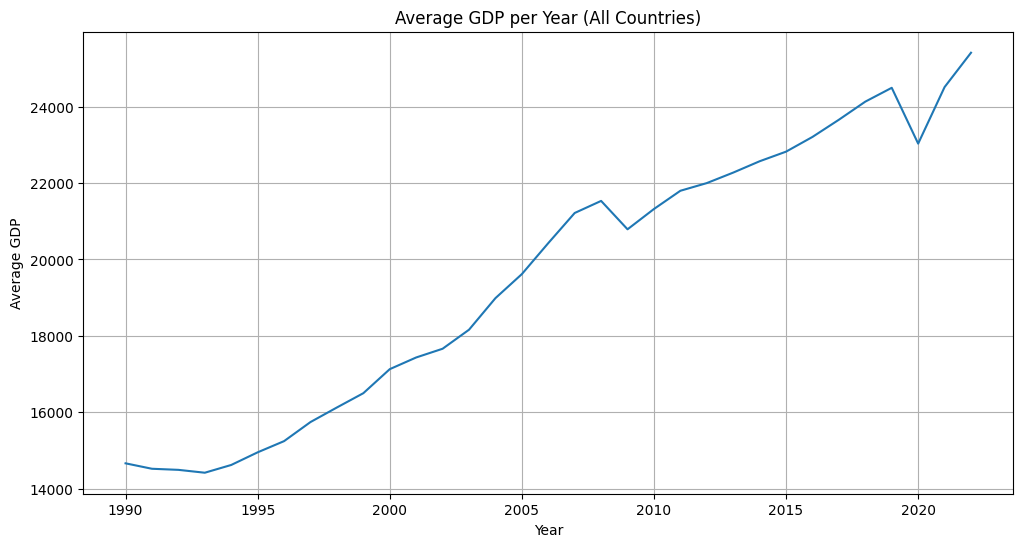

In [8]:
# Calculate the average GDP for each year
average_gdp_per_year = gdp_adm0_long.groupby('Year')['GDP'].mean().reset_index()

# Plot the average GDP per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_gdp_per_year, x='Year', y='GDP')
plt.title('Average GDP per Year (All Countries)')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.grid(True)
plt.show()

In [6]:
# Reshape the DataFrame to long format
gdp_adm0_long = gdp_adm0_df.melt(id_vars=['GID_nmbr', 'iso3', 'Country', 'slope'],
                                 var_name='Year',
                                 value_name='GDP')

# Convert 'Year' column to numeric
gdp_adm0_long['Year'] = pd.to_numeric(gdp_adm0_long['Year'])

display(gdp_adm0_long.head())

,GID_nmbr,iso3,Country,slope,Year,GDP
0,4,ALB,Albania,0.02382,1990,4827.0
1,54,DZA,Algeria,0.00581,1990,8829.0
2,3,AGO,Angola,0.00954,1990,5793.0
3,10,ATG,Antigua and Barbuda,0.00413,1990,17017.0
4,7,ARG,Argentina,0.00613,1990,14137.0


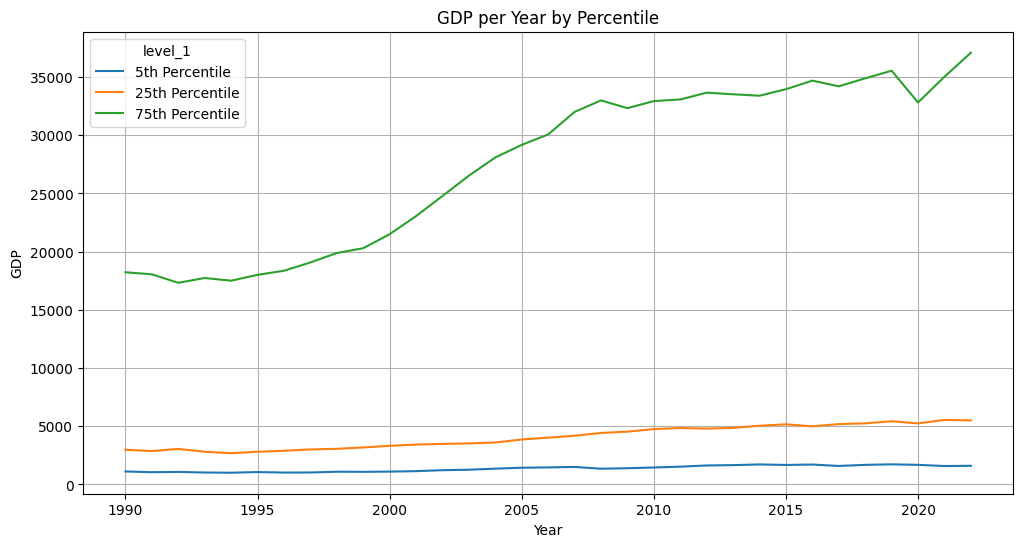

In [9]:
# Calculate the GDP for different percentiles for each year
percentile_gdp_per_year = gdp_adm0_long.groupby('Year')['GDP'].quantile([0.05, 0.25, 0.75]).reset_index()
percentile_gdp_per_year['level_1'] = percentile_gdp_per_year['level_1'].map({0.05: '5th Percentile', 0.25: '25th Percentile', 0.75: '75th Percentile'})

# Plot the GDP trends for different percentiles
plt.figure(figsize=(12, 6))
sns.lineplot(data=percentile_gdp_per_year, x='Year', y='GDP', hue='level_1')
plt.title('GDP per Year by Percentile')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

TODO: Come back and clean this up properly

This is interesting, indicating that for the 5th percentile of countries, the gdp for the country is not being changed drastically. Same for the 25th percentile.

The model that needs to be developed has to be robust to handle this bias


Things to take Note of {Generated by Gemini}

Feature Engineering:
Lagged Variables: Include the GDP from previous years as features. This can help the model capture the historical trend of each country.
Growth Rate: Calculate and include the historical growth rate of GDP for each country. This can be a strong indicator of future growth.
Country-Specific Features: If available, include other country-specific features that might influence GDP growth, such as political stability, education levels, infrastructure development, etc.
Model Selection:
Tree-Based Models: Models like Random Forests or Gradient Boosting (e.g., LightGBM, XGBoost) are often good at capturing non-linear relationships and interactions between features, which can be helpful when dealing with different growth patterns.
Time Series Models: While you have panel data (multiple countries over time), you could explore time series models that can handle multiple series, such as a panel data approach with ARIMA or a state-space model.
Mixed-Effects Models: These models can account for both fixed effects (common to all countries) and random effects (specific to each country), allowing you to model the overall trend while also capturing country-specific variations.
Handling Bias:
Stratified Sampling: When training your model, consider using stratified sampling to ensure that your training data includes a representative sample of countries from different income levels or growth rate groups.
Weighted Loss Function: You could potentially use a weighted loss function during training that gives more weight to the predictions for countries where the model is struggling (e.g., lower-income countries with less predictable growth).
Separate Models: As you initially considered, you could train separate models for different groups of countries (e.g., one model for low-growth countries and another for high-growth countries). However, this can be more complex to manage and may require defining clear criteria for grouping countries.
Ensemble Methods: Combine predictions from multiple models. You could train different models on different subsets of the data or using different algorithms and then combine their predictions to improve robustness.
Evaluation Metrics:
Beyond overall metrics like Mean Squared Error (MSE) or R-squared, evaluate your model's performance specifically on different subgroups of countries (e.g., by income level or growth rate) to ensure it's not performing poorly on certain groups.
Yes, the model needs to be robust to handle this bias. Simply training a single model on the entire dataset without considering the different growth patterns could lead to a model that performs well on average but poorly for countries that deviate significantly from the mean trend. By incorporating the strategies mentioned above, you can build a more robust model that can better predict GDP for a wider range of countries.

In [13]:
print(gdp_adm0_df['iso3'].nunique())
print(gdp_adm1_df['iso3'].nunique())
print(gdp_adm2_df['iso3'].nunique())



235
235
253


Need to keep in mind the following:
- some regions have mistaken smaller regions within



# Task
Perform comprehensive exploratory data analysis on the `gdp_adm0_df`, `gdp_adm1_df`, and `gdp_adm2_df` dataframes.

## Check for missing values

### Subtask:
Identify and quantify missing values in each DataFrame (`gdp_adm0_df`, `gdp_adm1_df`, and `gdp_adm2_df`).


**Reasoning**:
Calculate and print the sum of missing values for each column in the `gdp_adm0_df` DataFrame.



In [14]:
missing_values_adm0 = gdp_adm0_df.isnull().sum()
print("Missing values in gdp_adm0_df:")
print(missing_values_adm0)

Missing values in gdp_adm0_df:
GID_nmbr     0
iso3        15
Country     15
slope       15
1990        15
1991        15
1992        15
1993        15
1994        15
1995        15
1996        15
1997        15
1998        15
1999        15
2000        15
2001        15
2002        15
2003        15
2004        15
2005        15
2006        15
2007        15
2008        15
2009        15
2010        15
2011        15
2012        15
2013        15
2014        15
2015        15
2016        15
2017        15
2018        15
2019        15
2020        15
2021        15
2022        15
dtype: int64


**Reasoning**:
Calculate and print the sum of missing values for each column in the `gdp_adm1_df` DataFrame.



In [15]:
missing_values_adm1 = gdp_adm1_df.isnull().sum()
print("\nMissing values in gdp_adm1_df:")
print(missing_values_adm1)


Missing values in gdp_adm1_df:
GID_nmbr      0
iso3          0
Country       0
Subnat      146
slope         0
1990          0
1991          0
1992          0
1993          0
1994          0
1995          0
1996          0
1997          0
1998          0
1999          0
2000          0
2001          0
2002          0
2003          0
2004          0
2005          0
2006          0
2007          0
2008          0
2009          0
2010          0
2011          0
2012          0
2013          0
2014          0
2015          0
2016          0
2017          0
2018          0
2019          0
2020          0
2021          0
2022          0
dtype: int64


**Reasoning**:
Calculate and print the sum of missing values for each column in the `gdp_adm2_df` DataFrame.



In [16]:
missing_values_adm2 = gdp_adm2_df.isnull().sum()
print("\nMissing values in gdp_adm2_df:")
print(missing_values_adm2)


Missing values in gdp_adm2_df:
GID_2         1
adm2ID       54
iso3          1
NAME_2      106
slope       152
1990        152
1991        152
1992        152
1993        152
1994        152
1995        152
1996        152
1997        152
1998        152
1999        152
2000        152
2001        152
2002        152
2003        152
2004        152
2005        152
2006        152
2007        152
2008        152
2009        152
2010        152
2011        152
2012        152
2013        152
2014        152
2015        152
2016        152
2017        152
2018        152
2019        152
2020        152
2021        152
2022        152
id        48009
dtype: int64


## Examine data types

### Subtask:
Check the data types of columns in each DataFrame to ensure they are appropriate for analysis.


**Reasoning**:
Print the data types of the columns in each DataFrame using the `.info()` method to check if they are appropriate for analysis.



In [17]:
print("Data types in gdp_adm0_df:")
gdp_adm0_df.info()

print("\nData types in gdp_adm1_df:")
gdp_adm1_df.info()

print("\nData types in gdp_adm2_df:")
gdp_adm2_df.info()

Data types in gdp_adm0_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GID_nmbr  250 non-null    int64  
 1   iso3      235 non-null    object 
 2   Country   235 non-null    object 
 3   slope     235 non-null    float64
 4   1990      235 non-null    float64
 5   1991      235 non-null    float64
 6   1992      235 non-null    float64
 7   1993      235 non-null    float64
 8   1994      235 non-null    float64
 9   1995      235 non-null    float64
 10  1996      235 non-null    float64
 11  1997      235 non-null    float64
 12  1998      235 non-null    float64
 13  1999      235 non-null    float64
 14  2000      235 non-null    float64
 15  2001      235 non-null    float64
 16  2002      235 non-null    float64
 17  2003      235 non-null    float64
 18  2004      235 non-null    float64
 19  2005      235 non-null    float64
 20  2006 

## Descriptive statistics

### Subtask:
Generate descriptive statistics (mean, median, standard deviation, etc.) for the numerical columns in each DataFrame.


**Reasoning**:
Generate and print descriptive statistics for the numerical columns in each DataFrame using the .describe() method.



In [18]:
print("Descriptive statistics for gdp_adm0_df:")
display(gdp_adm0_df.describe())

print("\nDescriptive statistics for gdp_adm1_df:")
display(gdp_adm1_df.describe())

print("\nDescriptive statistics for gdp_adm2_df:")
display(gdp_adm2_df.describe())

Descriptive statistics for gdp_adm0_df:


,GID_nmbr,slope,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,250.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,224.988000,0.010279,14660.382979,14517.982979,14489.544681,14414.412766,14617.561702,14948.587234,15241.638298,15741.395745,...,22273.795745,22570.731915,22822.395745,23208.034043,23658.357447,24132.119149,24494.374468,23032.472340,24513.136170,25412.851064
std,291.693249,0.008450,17375.438744,17380.727899,17364.505298,17202.355433,17690.346514,17893.111377,17928.002922,18450.915992,...,23362.643116,23593.239796,23497.142310,23795.725764,24220.529267,24745.780508,24960.772945,24081.342814,26131.034228,26840.543792
min,1.000000,-0.013740,461.000000,474.000000,430.000000,464.000000,123.000000,460.000000,494.000000,537.000000,...,624.000000,614.000000,595.000000,501.000000,459.000000,435.000000,426.000000,387.000000,396.000000,370.000000
25%,63.250000,0.004460,2978.500000,2873.500000,3056.500000,2810.500000,2686.500000,2812.500000,2897.000000,3010.500000,...,4861.500000,5045.500000,5166.000000,4996.500000,5189.500000,5250.000000,5432.500000,5250.000000,5546.000000,5508.500000
50%,126.500000,0.009200,8693.000000,8577.000000,8303.000000,8226.000000,8294.000000,8588.000000,8859.000000,9030.000000,...,14109.000000,14539.000000,14384.000000,14402.000000,14478.000000,14691.000000,14993.000000,13903.000000,14697.000000,15417.000000
75%,188.750000,0.015805,18234.500000,18054.000000,17327.500000,17738.500000,17508.000000,18012.000000,18362.000000,19075.500000,...,33523.000000,33402.000000,33962.000000,34696.500000,34209.000000,34895.000000,35549.500000,32822.500000,35029.000000,37095.000000
max,940.000000,0.039680,109695.000000,104676.000000,102664.000000,98953.000000,100975.000000,103082.000000,103178.000000,104580.000000,...,173659.000000,179468.000000,167809.000000,165846.000000,170876.000000,175287.000000,167259.000000,165284.000000,184083.000000,184640.000000



Descriptive statistics for gdp_adm1_df:


,GID_nmbr,slope,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,2.855000e+03,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,...,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000
mean,1.047123e+06,0.008974,20366.551313,20499.618564,20518.955867,20423.775131,20772.710333,21161.445534,21566.376883,22123.583538,...,28560.313835,28971.321891,29237.009107,29568.992995,30241.916287,30728.564273,31101.376532,29488.711033,31127.196848,31945.900876
std,2.502247e+05,0.007313,16471.054951,16912.871146,16846.033411,16615.594382,16926.619227,17113.166111,17266.334964,17668.064603,...,21665.104914,21887.997375,21791.653028,22246.613317,22750.191590,23142.655593,23329.174767,22127.398303,23290.466624,23693.582013
min,1.000000e+00,-0.025180,247.000000,254.000000,230.000000,248.000000,123.000000,125.000000,126.000000,157.000000,...,458.000000,581.000000,595.000000,501.000000,459.000000,435.000000,426.000000,387.000000,396.000000,370.000000
25%,1.049224e+06,0.004260,6778.500000,6716.000000,6692.500000,6683.500000,6559.500000,6672.500000,6873.000000,6929.000000,...,11045.000000,11211.500000,11378.500000,11511.000000,11649.000000,11868.500000,12113.500000,11623.500000,12277.500000,12610.000000
50%,1.085011e+06,0.007060,19172.000000,19086.000000,19059.000000,19013.000000,19218.000000,19610.000000,20272.000000,20829.000000,...,26740.000000,27300.000000,27719.000000,28189.000000,28947.000000,29492.000000,29918.000000,27879.000000,29843.000000,30885.000000
75%,1.157002e+06,0.013020,30151.000000,30410.500000,30542.500000,30414.000000,31164.000000,31825.500000,32497.000000,33135.000000,...,40316.000000,40828.000000,41342.500000,41818.000000,42489.500000,42953.500000,43457.000000,41518.500000,43501.500000,44518.500000
max,1.213009e+06,0.045290,167768.000000,184190.000000,165303.000000,144339.000000,142438.000000,143475.000000,141613.000000,141410.000000,...,282124.000000,274941.000000,291656.000000,308985.000000,314249.000000,311311.000000,312275.000000,303959.000000,320328.000000,312968.000000



Descriptive statistics for gdp_adm2_df:


,adm2ID,slope,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,id
count,4.795500e+04,47857.000000,47857.000000,47857.000000,47857.000000,47857.000000,47857.000000,47857.000000,47857.000000,47857.000000,...,47857.000000,47857.000000,47857.000000,47857.000000,47857.000000,47857.000000,47857.000000,47857.000000,47857.000000,0.0
mean,2.117720e+07,0.009849,11664.928913,11547.908728,11423.980087,11456.791943,11618.167290,11825.482772,12108.462942,12404.648536,...,17582.620933,17706.371983,17818.236057,18236.432894,18658.816014,18912.367344,18104.623545,19120.153018,19632.802976,NaN
std,8.902765e+05,0.008411,13126.802191,13342.573428,13174.283578,13126.077813,13308.566177,13483.009427,13709.241472,14018.409923,...,18473.871428,18499.457741,18630.514784,19214.726040,19814.396841,20047.528754,19238.462060,20449.953331,21022.733932,NaN
min,2.001000e+07,-0.031930,147.000000,150.000000,138.000000,163.000000,114.000000,91.000000,86.000000,113.000000,...,313.000000,293.000000,273.000000,249.000000,210.000000,214.000000,196.000000,207.000000,193.000000,NaN
25%,2.050001e+07,0.004330,3209.000000,3194.000000,3162.000000,3175.000000,3205.000000,3260.000000,3363.000000,3395.000000,...,5689.000000,5687.000000,5731.000000,5782.000000,5938.000000,5955.000000,5689.000000,5900.000000,5998.000000,NaN
50%,2.123117e+07,0.008930,6830.000000,6658.000000,6438.000000,6477.000000,6504.000000,6612.000000,6794.000000,6866.000000,...,11111.000000,11163.000000,11188.000000,11434.000000,11771.000000,11855.000000,11357.000000,12029.000000,12314.000000,NaN
75%,2.163126e+07,0.014800,15865.000000,15473.000000,15201.000000,15161.000000,15307.000000,15497.000000,15988.000000,16512.000000,...,23922.000000,24262.000000,24667.000000,25280.000000,26008.000000,26493.000000,25278.000000,26658.000000,27530.000000,NaN
max,2.940000e+07,0.067670,251897.000000,339167.000000,295644.000000,285218.000000,282394.000000,240313.000000,181855.000000,181810.000000,...,275200.000000,291818.000000,322208.000000,327925.000000,343779.000000,326261.000000,305194.000000,332180.000000,361969.000000,NaN


## Analyze unique values

### Subtask:
Check the number of unique values in key categorical columns like 'iso3' and 'Country' to understand the coverage of the datasets.


**Reasoning**:
Check the number of unique values in the 'iso3' and 'Country' columns for each dataframe to understand their coverage.



In [19]:
print("Number of unique 'iso3' values in gdp_adm0_df:", gdp_adm0_df['iso3'].nunique())
print("Number of unique 'iso3' values in gdp_adm1_df:", gdp_adm1_df['iso3'].nunique())
print("Number of unique 'iso3' values in gdp_adm2_df:", gdp_adm2_df['iso3'].nunique())

print("\nNumber of unique 'Country' values in gdp_adm0_df:", gdp_adm0_df['Country'].nunique())
print("Number of unique 'Country' values in gdp_adm1_df:", gdp_adm1_df['Country'].nunique())

Number of unique 'iso3' values in gdp_adm0_df: 235
Number of unique 'iso3' values in gdp_adm1_df: 235
Number of unique 'iso3' values in gdp_adm2_df: 253

Number of unique 'Country' values in gdp_adm0_df: 235
Number of unique 'Country' values in gdp_adm1_df: 235


## Visualize data distributions

### Subtask:
Create visualizations (histograms, box plots) to understand the distribution of GDP values and other relevant numerical features.


**Reasoning**:
Create a histogram of the 'slope' column in `gdp_adm0_df` and `gdp_adm1_df` and `gdp_adm2_df` to visualize its distribution.



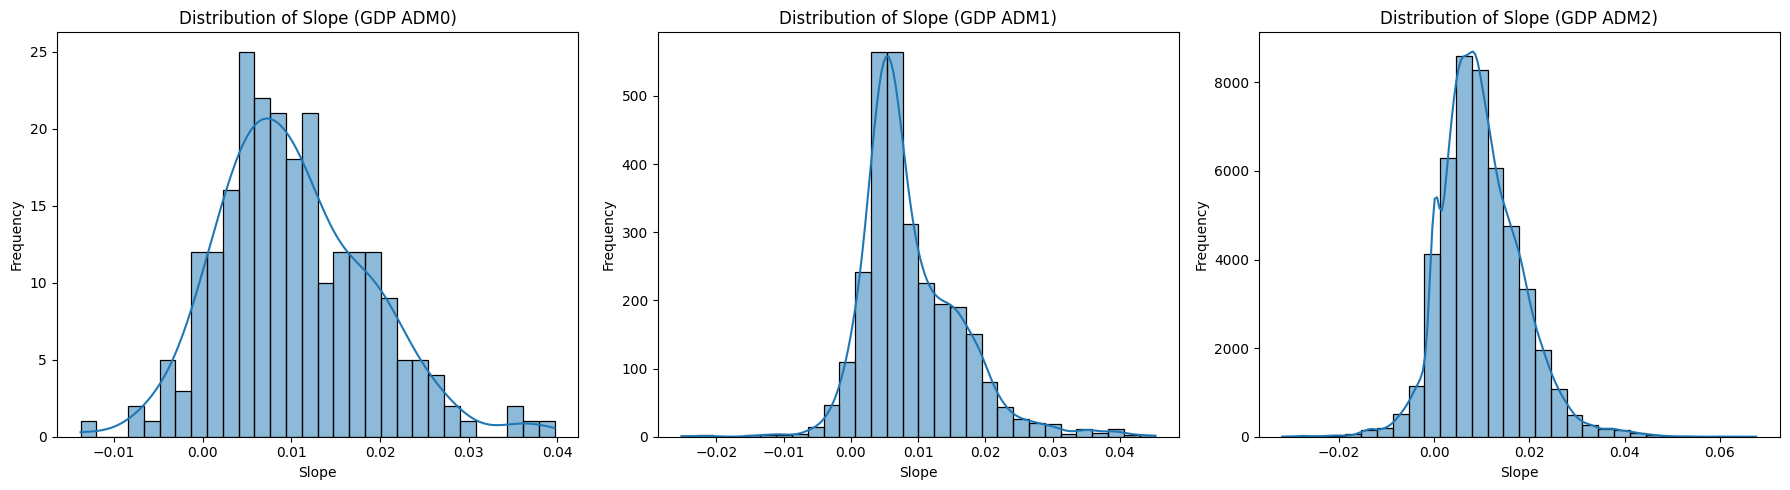

In [20]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=gdp_adm0_df, x='slope', kde=True, bins=30)
plt.title('Distribution of Slope (GDP ADM0)')
plt.xlabel('Slope')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(data=gdp_adm1_df, x='slope', kde=True, bins=30)
plt.title('Distribution of Slope (GDP ADM1)')
plt.xlabel('Slope')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data=gdp_adm2_df, x='slope', kde=True, bins=30)
plt.title('Distribution of Slope (GDP ADM2)')
plt.xlabel('Slope')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots for the GDP values of selected years in `gdp_adm0_long`, `gdp_adm1_df` and `gdp_adm2_df` to see the distribution and identify potential outliers across different years.



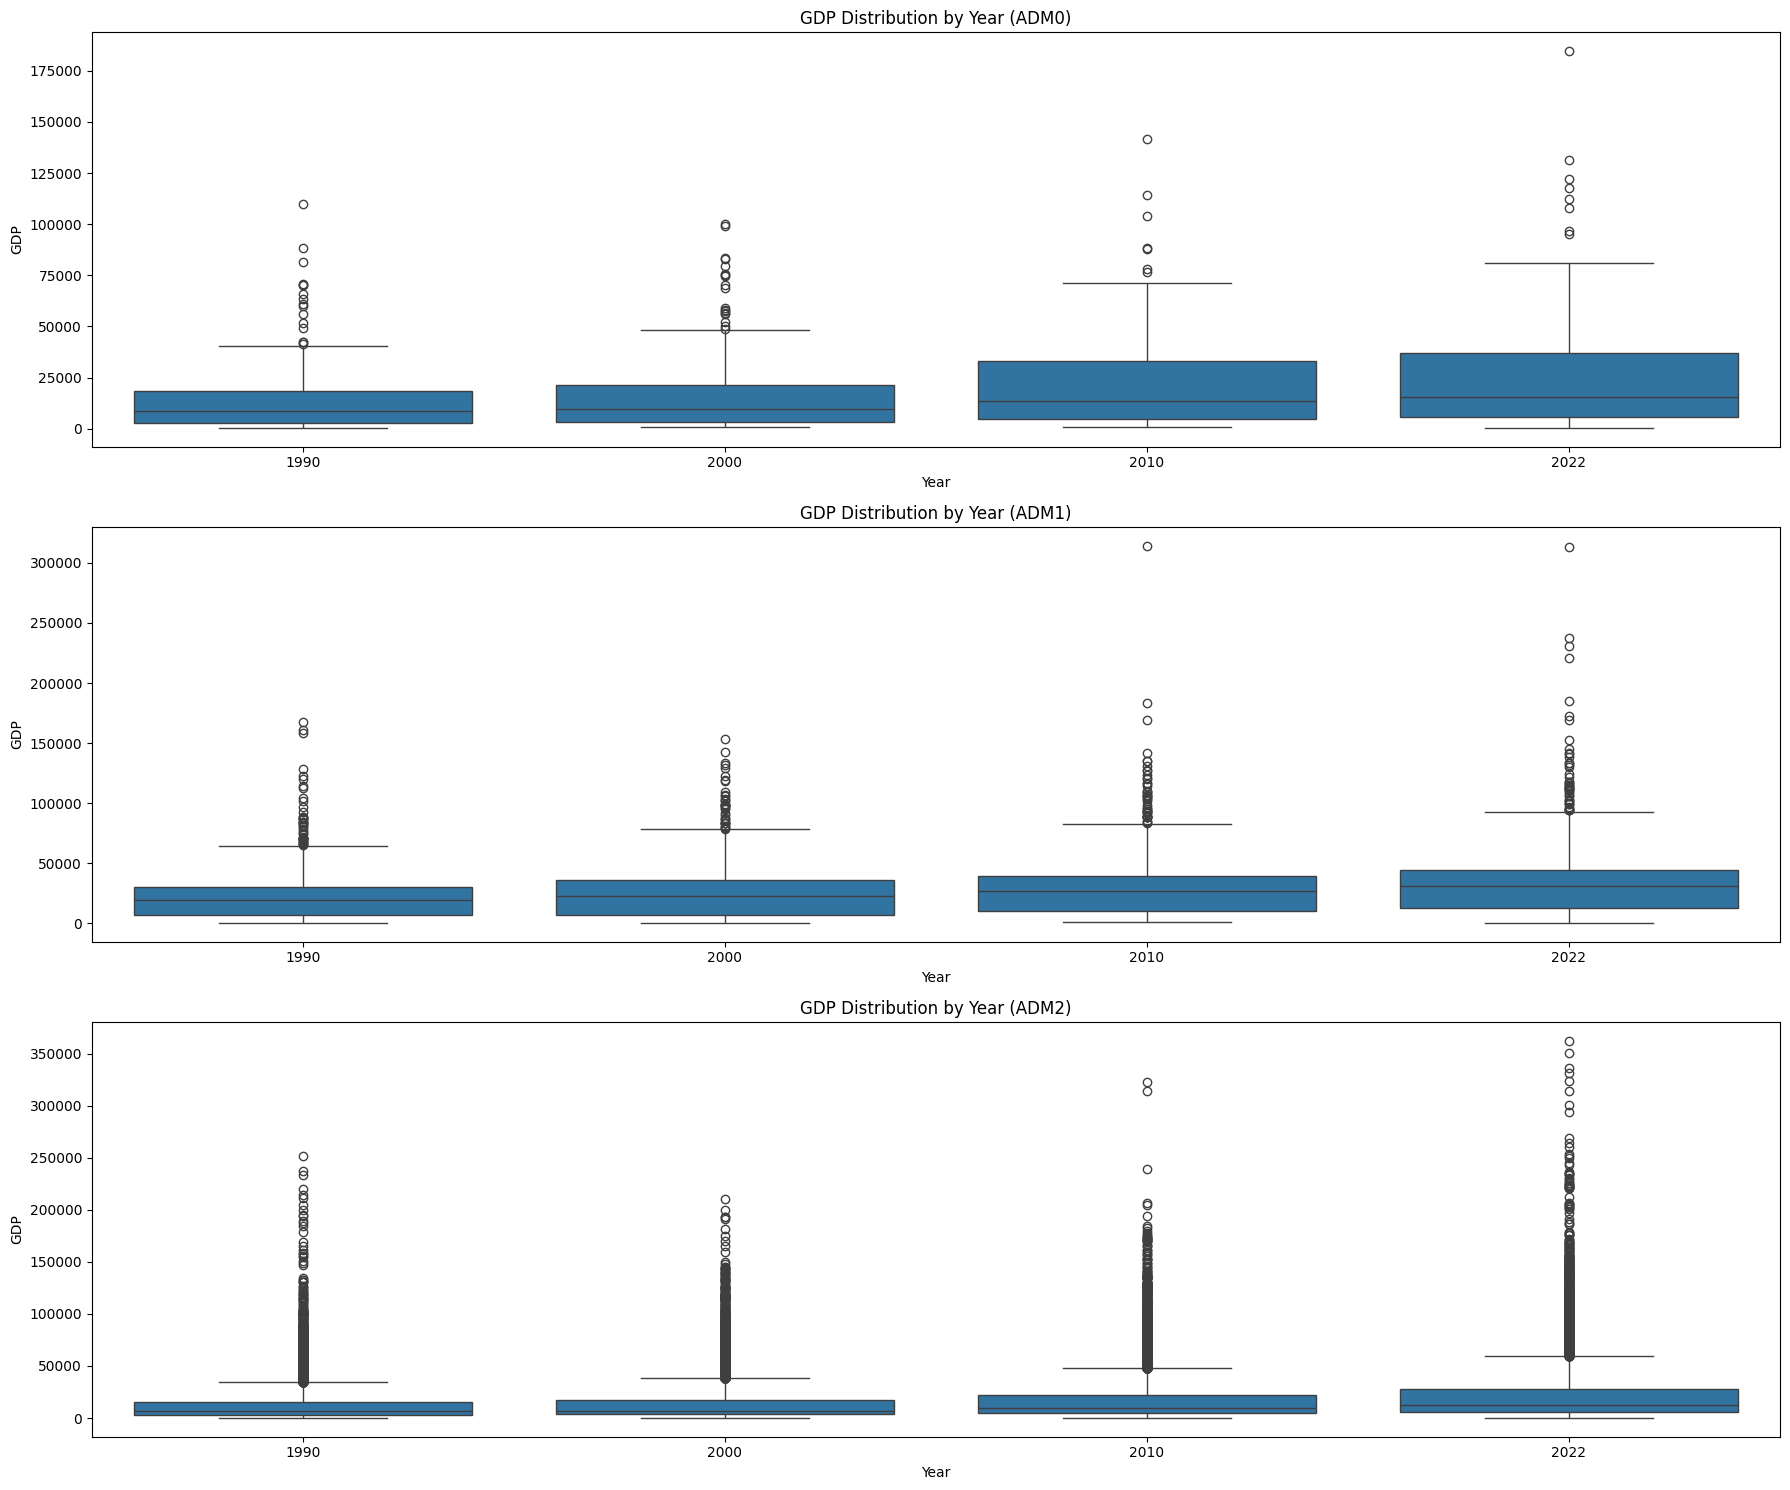

In [21]:
# Select a few years for box plots
selected_years = [1990, 2000, 2010, 2022]

# Reshape gdp_adm1_df to long format
gdp_adm1_long = gdp_adm1_df.melt(id_vars=['GID_nmbr', 'iso3', 'Country', 'Subnat', 'slope'],
                                 var_name='Year',
                                 value_name='GDP')
gdp_adm1_long['Year'] = pd.to_numeric(gdp_adm1_long['Year'])

# Reshape gdp_adm2_df to long format
gdp_adm2_long = gdp_adm2_df.melt(id_vars=['GID_2', 'adm2ID', 'iso3', 'NAME_2', 'slope', 'id'],
                                 var_name='Year',
                                 value_name='GDP')
gdp_adm2_long['Year'] = pd.to_numeric(gdp_adm2_long['Year'], errors='coerce')

# Filter for selected years
gdp_adm0_selected_years = gdp_adm0_long[gdp_adm0_long['Year'].isin(selected_years)]
gdp_adm1_selected_years = gdp_adm1_long[gdp_adm1_long['Year'].isin(selected_years)]
gdp_adm2_selected_years = gdp_adm2_long[gdp_adm2_long['Year'].isin(selected_years)]


plt.figure(figsize=(18, 15))

plt.subplot(3, 1, 1)
sns.boxplot(data=gdp_adm0_selected_years, x='Year', y='GDP')
plt.title('GDP Distribution by Year (ADM0)')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.subplot(3, 1, 2)
sns.boxplot(data=gdp_adm1_selected_years, x='Year', y='GDP')
plt.title('GDP Distribution by Year (ADM1)')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.subplot(3, 1, 3)
sns.boxplot(data=gdp_adm2_selected_years, x='Year', y='GDP')
plt.title('GDP Distribution by Year (ADM2)')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.tight_layout()
plt.show()

## Analyze 'slope' column

### Subtask:
Investigate the 'slope' column in each DataFrame, which seems to represent a trend, and potentially visualize its distribution or relationship with other variables.


**Reasoning**:
Calculate and print the mean, median, and standard deviation of the 'slope' column for each DataFrame and create box plots to visualize their distributions.



Descriptive statistics for 'slope' in gdp_adm0_df:


,slope
count,235.000000
mean,0.010279
std,0.008450
min,-0.013740
25%,0.004460
50%,0.009200
75%,0.015805
max,0.039680



Descriptive statistics for 'slope' in gdp_adm1_df:


,slope
count,2855.000000
mean,0.008974
std,0.007313
min,-0.025180
25%,0.004260
50%,0.007060
75%,0.013020
max,0.045290



Descriptive statistics for 'slope' in gdp_adm2_df:


,slope
count,47857.000000
mean,0.009849
std,0.008411
min,-0.031930
25%,0.004330
50%,0.008930
75%,0.014800
max,0.067670


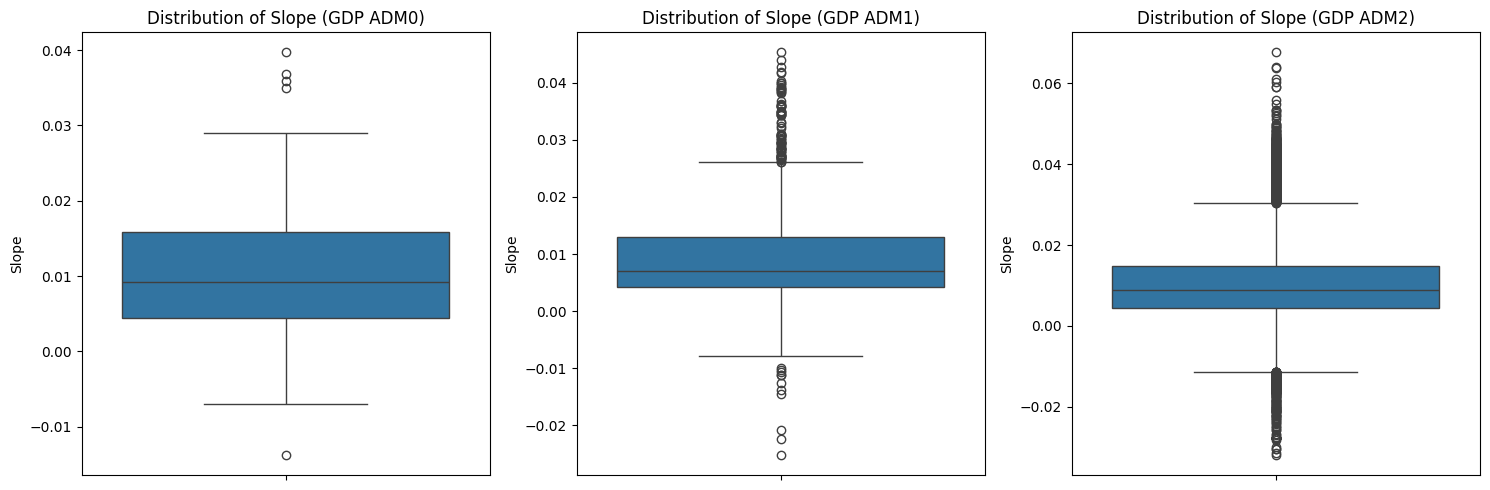

In [22]:
# Calculate and print descriptive statistics for the 'slope' column
print("Descriptive statistics for 'slope' in gdp_adm0_df:")
display(gdp_adm0_df['slope'].describe())

print("\nDescriptive statistics for 'slope' in gdp_adm1_df:")
display(gdp_adm1_df['slope'].describe())

print("\nDescriptive statistics for 'slope' in gdp_adm2_df:")
display(gdp_adm2_df['slope'].describe())

# Create box plots for the 'slope' column
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=gdp_adm0_df['slope'])
plt.title('Distribution of Slope (GDP ADM0)')
plt.ylabel('Slope')

plt.subplot(1, 3, 2)
sns.boxplot(y=gdp_adm1_df['slope'])
plt.title('Distribution of Slope (GDP ADM1)')
plt.ylabel('Slope')

plt.subplot(1, 3, 3)
sns.boxplot(y=gdp_adm2_df['slope'])
plt.title('Distribution of Slope (GDP ADM2)')
plt.ylabel('Slope')

plt.tight_layout()
plt.show()

**Reasoning**:
Create scatter plots to explore the relationship between 'slope' and the mean GDP for each administrative level, as requested in the instructions.



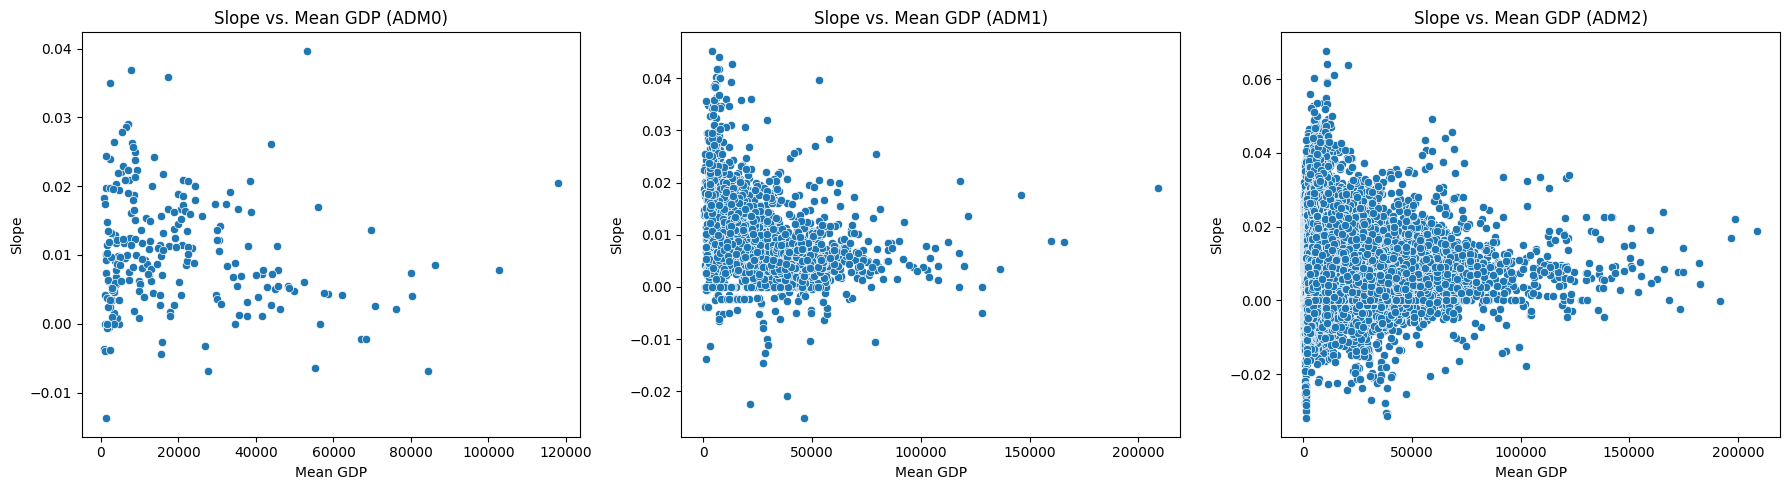

In [23]:
# Calculate the mean GDP for each row (across years) for each dataframe
gdp_adm0_df['mean_gdp'] = gdp_adm0_df.loc[:, '1990':'2022'].mean(axis=1)
gdp_adm1_df['mean_gdp'] = gdp_adm1_df.loc[:, '1990':'2022'].mean(axis=1)
gdp_adm2_df['mean_gdp'] = gdp_adm2_df.loc[:, '1990':'2022'].mean(axis=1)

# Create scatter plots to show the relationship between slope and mean GDP
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=gdp_adm0_df, x='mean_gdp', y='slope')
plt.title('Slope vs. Mean GDP (ADM0)')
plt.xlabel('Mean GDP')
plt.ylabel('Slope')

plt.subplot(1, 3, 2)
sns.scatterplot(data=gdp_adm1_df, x='mean_gdp', y='slope')
plt.title('Slope vs. Mean GDP (ADM1)')
plt.xlabel('Mean GDP')
plt.ylabel('Slope')

plt.subplot(1, 3, 3)
sns.scatterplot(data=gdp_adm2_df, x='mean_gdp', y='slope')
plt.title('Slope vs. Mean GDP (ADM2)')
plt.xlabel('Mean GDP')
plt.ylabel('Slope')

plt.tight_layout()
plt.show()

## Explore relationships between variables

### Subtask:
Explore relationships between GDP and other columns using scatter plots or correlation matrices.


**Reasoning**:
Calculate and display the correlation matrix for the numerical columns in each dataframe.



In [24]:
correlation_matrix_adm0 = gdp_adm0_df.select_dtypes(include=np.number).corr()
print("Correlation matrix for gdp_adm0_df:")
display(correlation_matrix_adm0)

correlation_matrix_adm1 = gdp_adm1_df.select_dtypes(include=np.number).corr()
print("\nCorrelation matrix for gdp_adm1_df:")
display(correlation_matrix_adm1)

correlation_matrix_adm2 = gdp_adm2_df.select_dtypes(include=np.number).corr()
print("\nCorrelation matrix for gdp_adm2_df:")
display(correlation_matrix_adm2)

Correlation matrix for gdp_adm0_df:


,GID_nmbr,slope,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,mean_gdp
GID_nmbr,1.000000,0.094183,-0.008120,-0.010621,-0.008619,-0.009030,0.003167,0.007545,0.011616,0.018966,...,0.058982,0.055233,0.063247,0.066522,0.064999,0.066955,0.054359,0.049213,0.049668,0.042209
slope,0.094183,1.000000,-0.313327,-0.325778,-0.333342,-0.334461,-0.332228,-0.314777,-0.303813,-0.297054,...,-0.007287,0.001597,0.009963,0.020798,0.033141,0.042466,0.063588,0.068739,0.072545,-0.132598
1990,-0.008120,-0.313327,1.000000,0.997422,0.991213,0.979254,0.969938,0.961613,0.954722,0.954606,...,0.805642,0.806257,0.803134,0.793301,0.782180,0.781647,0.760180,0.746780,0.742889,0.905571
1991,-0.010621,-0.325778,0.997422,1.000000,0.995425,0.984544,0.976030,0.965870,0.958887,0.957937,...,0.807716,0.807784,0.804128,0.794596,0.783144,0.782118,0.760335,0.747154,0.742878,0.907153
1992,-0.008619,-0.333342,0.991213,0.995425,1.000000,0.995626,0.990302,0.981967,0.975957,0.974734,...,0.824707,0.823705,0.819296,0.808743,0.796741,0.794696,0.772952,0.759457,0.755325,0.921674
1993,-0.009030,-0.334461,0.979254,0.984544,0.995626,1.000000,0.996920,0.989516,0.984368,0.982116,...,0.833335,0.832571,0.828520,0.817987,0.806100,0.803689,0.782954,0.769441,0.766024,0.928720
1994,0.003167,-0.332228,0.969938,0.976030,0.990302,0.996920,1.000000,0.995559,0.991934,0.989491,...,0.845478,0.843221,0.839638,0.830733,0.819268,0.816069,0.794942,0.781352,0.777700,0.936858
1995,0.007545,-0.314777,0.961613,0.965870,0.981967,0.989516,0.995559,1.000000,0.998859,0.995621,...,0.869088,0.866536,0.862805,0.854713,0.844080,0.839514,0.820477,0.807976,0.803704,0.952363
1996,0.011616,-0.303813,0.954722,0.958887,0.975957,0.984368,0.991934,0.998859,1.000000,0.997205,...,0.878613,0.876587,0.872966,0.865500,0.855241,0.850439,0.831861,0.819230,0.815142,0.958227
1997,0.018966,-0.297054,0.954606,0.957937,0.974734,0.982116,0.989491,0.995621,0.997205,1.000000,...,0.877892,0.876599,0.872860,0.864780,0.854300,0.850217,0.831666,0.818227,0.814200,0.959252



Correlation matrix for gdp_adm1_df:


,GID_nmbr,slope,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,mean_gdp
GID_nmbr,1.000000,0.015414,0.046157,0.042911,0.042185,0.043729,0.043288,0.043859,0.046748,0.046502,...,0.038516,0.040122,0.037350,0.039417,0.040916,0.040926,0.046737,0.046085,0.043213,0.042719
slope,0.015414,1.000000,-0.488239,-0.504420,-0.514106,-0.515437,-0.516399,-0.513458,-0.508955,-0.503846,...,-0.274791,-0.270821,-0.260286,-0.249367,-0.237256,-0.229991,-0.213728,-0.210520,-0.208743,-0.379912
1990,0.046157,-0.488239,1.000000,0.982198,0.980842,0.979518,0.974692,0.972409,0.969104,0.968657,...,0.909708,0.911758,0.908548,0.903111,0.897760,0.894043,0.885903,0.881470,0.877640,0.960787
1991,0.042911,-0.504420,0.982198,1.000000,0.997403,0.992900,0.986181,0.981191,0.974848,0.970952,...,0.894567,0.896275,0.893339,0.887459,0.881350,0.877372,0.869209,0.864092,0.860282,0.950552
1992,0.042185,-0.514106,0.980842,0.997403,1.000000,0.998396,0.994672,0.991107,0.986126,0.982905,...,0.899759,0.901334,0.898022,0.891514,0.884874,0.880822,0.872219,0.867034,0.863985,0.957073
1993,0.043729,-0.515437,0.979518,0.992900,0.998396,1.000000,0.998310,0.995736,0.992120,0.989635,...,0.905200,0.906920,0.903212,0.896592,0.889854,0.885786,0.876983,0.872206,0.869901,0.962392
1994,0.043288,-0.516399,0.974692,0.986181,0.994672,0.998310,1.000000,0.998852,0.996610,0.994630,...,0.906240,0.907973,0.904102,0.897316,0.890366,0.886448,0.877081,0.872378,0.870942,0.964053
1995,0.043859,-0.513458,0.972409,0.981191,0.991107,0.995736,0.998852,1.000000,0.998827,0.997133,...,0.909483,0.911533,0.907622,0.900975,0.894065,0.890097,0.880953,0.876676,0.875731,0.966757
1996,0.046748,-0.508955,0.969104,0.974848,0.986126,0.992120,0.996610,0.998827,1.000000,0.999045,...,0.912335,0.914522,0.910347,0.903826,0.896987,0.893081,0.883826,0.879746,0.879303,0.968990
1997,0.046502,-0.503846,0.968657,0.970952,0.982905,0.989635,0.994630,0.997133,0.999045,1.000000,...,0.915103,0.917621,0.913262,0.906814,0.900021,0.896225,0.886831,0.883135,0.882996,0.971165



Correlation matrix for gdp_adm2_df:


,adm2ID,slope,1990,1991,1992,1993,1994,1995,1996,1997,...,2015,2016,2017,2018,2019,2020,2021,2022,id,mean_gdp
adm2ID,1.000000,0.073758,0.075493,0.060938,0.060216,0.059403,0.057220,0.060670,0.064124,0.068289,...,0.116170,0.122948,0.124042,0.127412,0.129686,0.127575,0.129235,0.125382,NaN,0.106090
slope,0.073758,1.000000,-0.291585,-0.311484,-0.321372,-0.322298,-0.322516,-0.317749,-0.311868,-0.307577,...,-0.048779,-0.040711,-0.028052,-0.017220,-0.009739,-0.004929,0.002519,0.007612,NaN,-0.156607
1990,0.075493,-0.291585,1.000000,0.966775,0.962516,0.958495,0.948400,0.944510,0.940704,0.938049,...,0.863516,0.860930,0.854030,0.847117,0.842643,0.839433,0.829933,0.817924,NaN,0.927384
1991,0.060938,-0.311484,0.966775,1.000000,0.991632,0.982579,0.970881,0.962110,0.953094,0.944946,...,0.842511,0.839763,0.831934,0.824481,0.819941,0.816346,0.806726,0.795720,NaN,0.913897
1992,0.060216,-0.321372,0.962516,0.991632,1.000000,0.992897,0.984090,0.977751,0.970266,0.963510,...,0.855588,0.852857,0.843378,0.835194,0.830711,0.826920,0.816887,0.806651,NaN,0.927043
1993,0.059403,-0.322298,0.958495,0.982579,0.992897,1.000000,0.992799,0.987335,0.979898,0.974723,...,0.865010,0.862066,0.852301,0.844566,0.840115,0.836156,0.826117,0.816395,NaN,0.936458
1994,0.057220,-0.322516,0.948400,0.970881,0.984090,0.992799,1.000000,0.993327,0.987999,0.983483,...,0.871389,0.868497,0.857858,0.850450,0.846454,0.841981,0.832186,0.823607,NaN,0.942101
1995,0.060670,-0.317749,0.944510,0.962110,0.977751,0.987335,0.993327,1.000000,0.994181,0.988951,...,0.878620,0.875639,0.865086,0.857075,0.852887,0.848580,0.838899,0.830646,NaN,0.947234
1996,0.064124,-0.311868,0.940704,0.953094,0.970266,0.979898,0.987999,0.994181,1.000000,0.994730,...,0.886059,0.883364,0.872627,0.864853,0.860642,0.856089,0.846513,0.838891,NaN,0.952831
1997,0.068289,-0.307577,0.938049,0.944946,0.963510,0.974723,0.983483,0.988951,0.994730,1.000000,...,0.893168,0.890378,0.879622,0.871587,0.867443,0.863231,0.853966,0.846419,NaN,0.957824


**Reasoning**:
Create heatmap visualizations for the calculated correlation matrices to visually represent the relationships between variables in each dataframe.



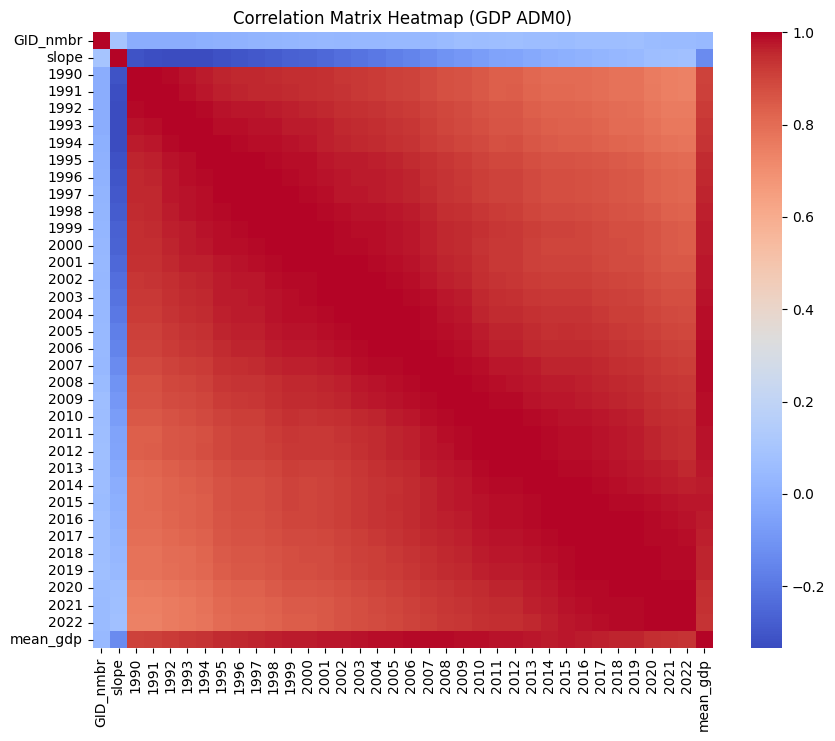

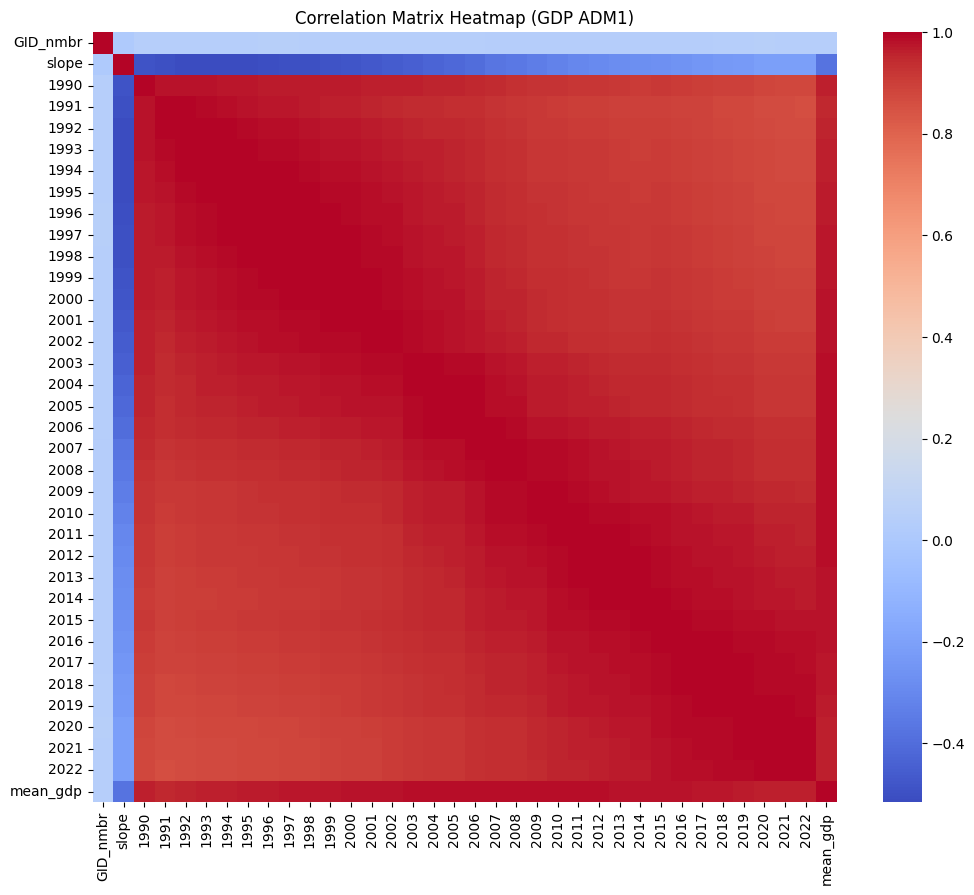

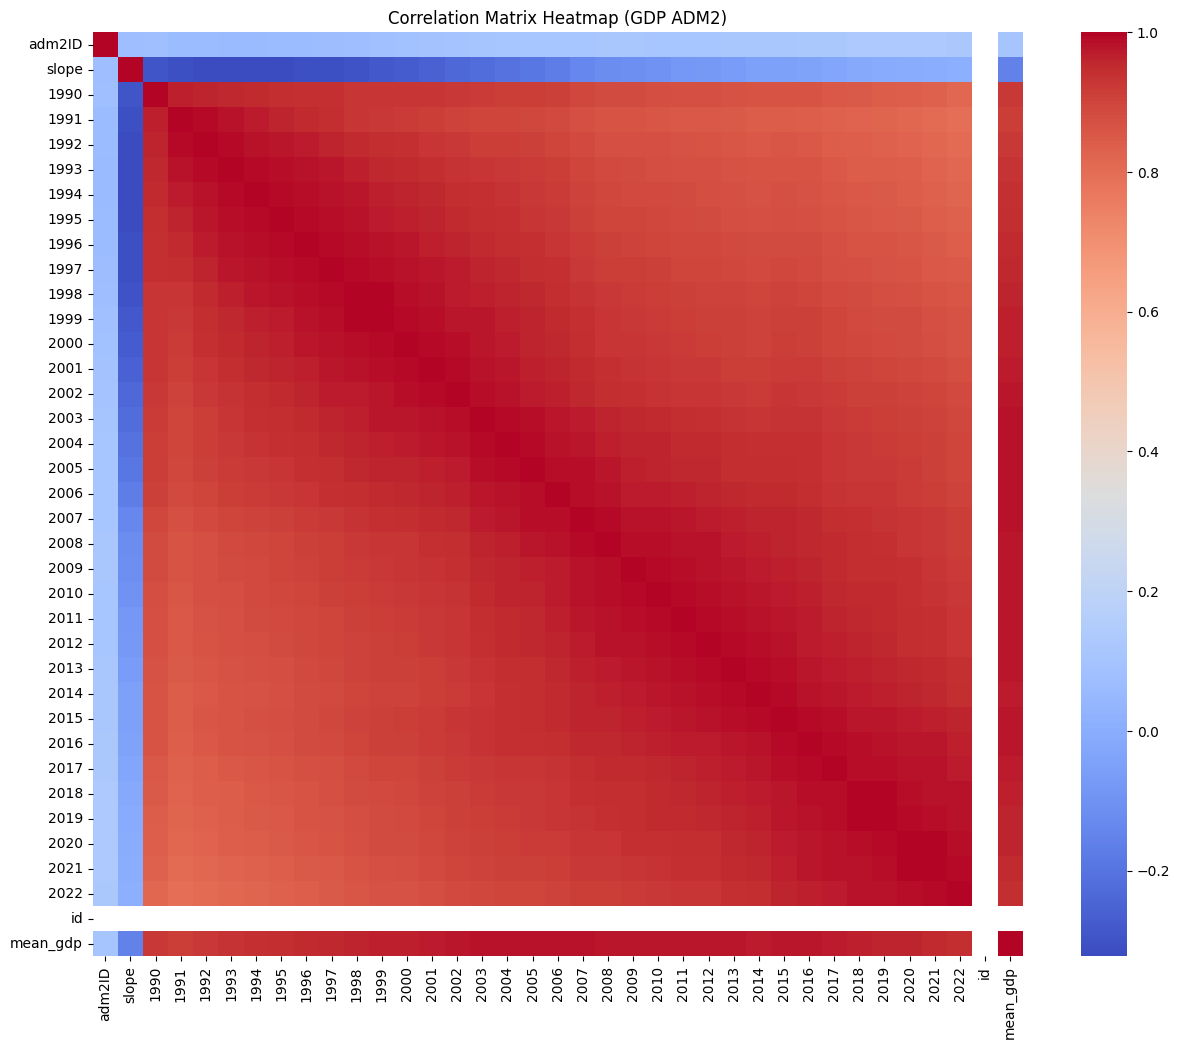

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_adm0, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (GDP ADM0)')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_adm1, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (GDP ADM1)')
plt.show()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_adm2, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (GDP ADM2)')
plt.show()

## Summarize findings

### Subtask:
Provide a summary of the key findings from the exploratory data analysis.


## Summary:

### Data Analysis Key Findings

*   **Missing Values:** The `gdp_adm0_df` had 15 missing values in several columns, including 'iso3', 'Country', 'slope', and all year columns. `gdp_adm1_df` had 146 missing values only in the 'Subnat' column. `gdp_adm2_df` had the most missing values, with 48009 in 'id', 152 in 'slope' and all year columns, 106 in 'NAME\_2', 54 in 'adm2ID', and 1 in 'GID\_2' and 'iso3'.
*   **Data Types:** All three dataframes contained a mix of `int64`, `object`, and `float64` data types. The year columns and 'slope' were primarily `float64`.
*   **Descriptive Statistics:** Descriptive statistics were generated for numerical columns, showing the count, mean, standard deviation, min, max, and quartiles for each.
*   **Unique Values:** The number of unique 'iso3' values was 235 in `gdp_adm0_df` and `gdp_adm1_df`, and 253 in `gdp_adm2_df`. The number of unique 'Country' values was 235 in `gdp_adm0_df` and `gdp_adm1_df`.
*   **Slope Distribution:** Histograms showed that the 'slope' distribution for all three administrative levels is heavily skewed towards zero, indicating mostly flat or slow GDP trends.
*   **GDP Distribution by Year:** Box plots revealed a significant increase in median GDP over time across all administrative levels, along with an increasing spread, suggesting greater economic disparity. Outliers representing regions with much higher GDP were also evident.
*   **Slope vs. Mean GDP:** Scatter plots did not show a strong linear relationship between the 'slope' of GDP growth and the mean GDP for any administrative level.
*   **Correlation Analysis:** High positive correlations were observed among GDP values across different years in all dataframes. A consistent negative correlation was found between the 'slope' column and GDP values. Correlation with geographical identifiers ('GID\_nmbr', 'adm2ID') was weak.

### Insights or Next Steps

*   Address the significant number of missing values in the 'id' column of `gdp_adm2_df` before further analysis involving this column.
*   Investigate the negative correlation between 'slope' and GDP to understand if regions with lower GDP tend to have higher growth rates or if there are other underlying factors.
